<a href="https://colab.research.google.com/github/sabinaML/Classification/blob/main/%D0%9E%D1%86%D0%B5%D0%BD%D0%BA%D0%B0_%D1%82%D0%BE%D1%87%D0%BD%D0%BE%D1%81%D1%82%D0%B8_%D0%BC%D0%BE%D0%B4%D0%B5%D0%BB%D0%B8%2C_%D0%BF%D0%B5%D1%80%D0%B5%D0%BE%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D0%B5%2C_%D1%80%D0%B5%D0%B3%D1%83%D0%BB%D1%8F%D1%80%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
import numpy as np
import pandas as pd # Для работы с данными
import scipy.stats # При работе со статистикой
import matplotlib.pyplot as plt  # Библиотека для визуализации результатов 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score, precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

Описание задания:
Решить задачу классификации при помощи обучения модели логистической регрессии. Качество модели оценивается путем подсчета метрик TPR, FPR и построения графиков ROC-кривой, Precision-Recall. 
Этапы работы:

Преобразуйте данные:
a. проверьте наличие пропущенных значений. Преобразуйте/удалите пропуски по необходимости;
b. закодируйте категориальные переменные числовыми значениями по необходимости.
Разделите выборку на обучающее (80% данных) и тестовое (20% данных) подмножества.
Постройте ROC-кривую с помощью функции sklearn.metrics. roc_curve.
Вычислите значение ROC-AUC метрики с помощью функции sklearn.metrics.roc_auc_score.
Реализуйте подсчет метрик TPR, FPR «вручную», без использования готовых функций из библиотеки sklearn.
Постройте ROC-кривую с помощью вычисленных в п. 5 метрик: объедините графики из п. 3 и п. 6 в один. Сравните, сделайте вывод.
Постройте график Precision-Recall, используя метрики, посчитанные в п. 5.
*Вычислите значение ROC-AUC метрики, используя метрики, посчитанные в п. 5.
Сформулируйте выводы по проделанной работе:
a. как по полученным графикам сделать вывод о качестве модели? Как вы оцениваете обученную модель исходя из подсчитанных метрик?
b. *может ли ROC-кривая проходить ниже диагонали?

In [3]:
# считываем файл в дата фрейм
df = pd.read_csv('/content/drive/MyDrive/athletes.csv')
df

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
11533,265605954,Zurian Hechavarria,CUB,female,8/10/95,1.64,58.0,athletics,0,0,0
11534,214461847,Zuzana Hejnova,CZE,female,12/19/86,1.73,63.0,athletics,0,0,0
11535,88361042,di Xiao,CHN,male,5/14/91,1.85,100.0,wrestling,0,0,0
11536,900065925,le Quoc Toan Tran,VIE,male,4/5/89,1.60,56.0,weightlifting,0,0,0


In [23]:
# в дата фрейме имеются пропуски в атрибутах weight и height
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11538 entries, 0 to 11537
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           11538 non-null  int64  
 1   name         11538 non-null  object 
 2   nationality  11538 non-null  object 
 3   sex          11538 non-null  object 
 4   dob          11537 non-null  object 
 5   height       11208 non-null  float64
 6   weight       10879 non-null  float64
 7   sport        11538 non-null  object 
 8   gold         11538 non-null  int64  
 9   silver       11538 non-null  int64  
 10  bronze       11538 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 991.7+ KB


In [ ]:
# обнуляем ячейки с отсутствием данных
df=df.loc[df['height'].notnull() & df['weight'].notnull()]

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10858 entries, 0 to 11537
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           10858 non-null  int64  
 1   name         10858 non-null  object 
 2   nationality  10858 non-null  object 
 3   sex          10858 non-null  object 
 4   dob          10858 non-null  object 
 5   height       10858 non-null  float64
 6   weight       10858 non-null  float64
 7   sport        10858 non-null  object 
 8   gold         10858 non-null  int64  
 9   silver       10858 non-null  int64  
 10  bronze       10858 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 1017.9+ KB


In [34]:
#выберем признаки, по которым будем обучать модель
X = ['height', 'sport']

In [35]:
# тк признак sport - категориальная переменная, преобразуем ее в значения 0 и 1
X = pd.get_dummies(df[X])

In [42]:
X.head()

,height,sport_aquatics,sport_archery,sport_athletics,sport_badminton,sport_basketball,sport_canoe,sport_cycling,sport_equestrian,sport_fencing,...,sport_rugby sevens,sport_sailing,sport_shooting,sport_table tennis,sport_taekwondo,sport_tennis,sport_triathlon,sport_volleyball,sport_weightlifting,sport_wrestling
0,1.72,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.68,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1.98,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.83,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,1.81,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
# преобразуем целевую переменную в значения 0 и 1
le = LabelEncoder()
y = pd.Series(le.fit_transform(df['sex']))

In [41]:
y

0        1
1        0
2        1
3        1
4        1
        ..
10853    0
10854    0
10855    1
10856    1
10857    1
Length: 10858, dtype: int64

In [49]:
# Разбиваем данные на обучающую и тестовую выборки в соотношении 80 / 20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,  random_state=42)

In [50]:
# обучаем модель
model = LogisticRegression()
model.fit(X_train,  y_train)
#Получаем прогнозные значения модели (переменная y_pred)
y_pred = model.predict_proba(X_test)

In [85]:
# получаем значения false и true positive rate для различных значений порога
fpr, tpr, thres = roc_curve(y_test, y_pred[:, 1])

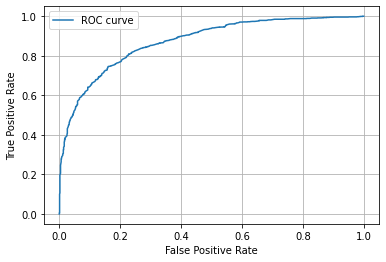

In [86]:
# Строим ROC кривую
plt.plot(fpr, tpr, label = 'ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.show()

In [108]:
# Площадь под ROC кривой
roc_auc_score(y_test, y_pred[:, 1])

0.8725055432372505

**Рассчитаем вручную метрики FPR и TPR для порогового значения 0.5**

In [77]:
tp = 0 # True positive
fp = 0 # False positive
fn = 0 # False negative
tn = 0 # True negative

predictions = model.predict_proba( X_test )
predicted = [1 if i >= 0.5 else 0 for i in predictions[:, 1]]
for predicted, actual in zip(predicted, y_test ):    
    
    if predicted == 1:
        if actual == 1:
            tp += 1
        else:
            fp += 1
    
    else:
        if actual == 1:
            fn += 1
        else:
            tn += 1
FPR = fp/(fp+tn)
TPR = tp/(tp+fn)    
print('FPR',FPR )  
print('TPR',TPR )       

FPR 0.22865853658536586
TPR 0.8089225589225589


**Построим ROC-кривую с помощью вычисленных метрик**

In [96]:
# сложим в списки значения, на основе которых будем строить кривую

predictions = model.predict_proba( X_test )
fpr_counted = []
tpr_counted =[]
thres_counted = []
precision = []
recall = []
for j in np.arange(0.1, 1.04, 0.05):
    tp = 0 # True positive
    fp = 0 # False positive
    fn = 0 # False negative
    tn = 0 # True negative
    predicted = [1 if i >= j else 0 for i in predictions[:, 1]]
    for predicted, actual in zip(predicted, y_test ):    
    
        if predicted == 1:
            if actual == 1:
                tp += 1
            else:
                fp += 1
    
        else:
            if actual == 1:
                fn += 1
            else:
                tn += 1
    fpr_counted.append(fp/(fp+tn))
    tpr_counted.append(tp/(tp+fn))
    thres_counted.append(j)
    if (tp + fp)>0: 
        precision.append(tp / (tp + fp))
        recall.append(tp/(tp+fn))


0

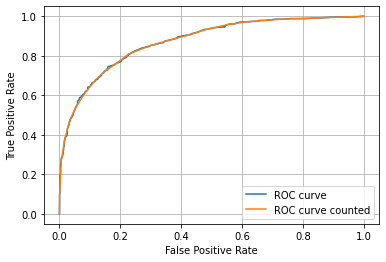

In [90]:
# Строим ROC кривые
# Кривая, построенная при помощи библиотеки, совпала с кривой, построенной вручную  
plt.plot(fpr, tpr, label = 'ROC curve')
plt.plot(fpr_counted, tpr_counted, label = 'ROC curve counted')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.show()

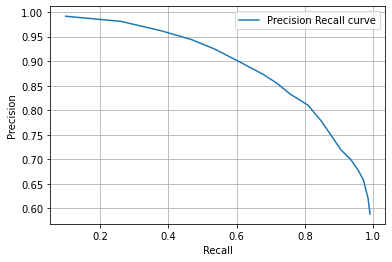

In [97]:
# Строим Precision Recall curve
# Кривая, построенная при помощи библиотеки, совпала с кривой, построенной вручную  
plt.plot(recall, precision, label = 'Precision Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.grid()
plt.show()

In [103]:
# сложим метрики в Дата Фрейм
 = pd.DataFrame([tpr_counted, fpr_counted, thres_counted]).T
metrics.columns = ['tpr', 'fpr', 'thres']

In [107]:
# рассчитаем максимально возможное значение параметра tpr + 1- fpr (доля истинно положительных+доля истинно отрицательных)
# максимальное значение достигается при пороговом значении 0,5
metrics['res'] = metrics['tpr']+ 1- metrics['fpr']
metrics.sort_values(by = ['res'], ascending = False)

,tpr,fpr,thres,res
8,0.808923,0.228659,0.50,1.580264
9,0.757576,0.183943,0.55,1.573633
10,0.717172,0.146341,0.60,1.570830
11,0.677609,0.118902,0.65,1.558707
7,0.847643,0.291667,0.45,1.555976
12,0.609428,0.083333,0.70,1.526094
6,0.879630,0.361789,0.40,1.517841
13,0.536195,0.052846,0.75,1.483350
5,0.904882,0.425813,0.35,1.479069
4,0.933502,0.482724,0.30,1.450778


**В идеальном случае, когда классификатор не делает ошибок (FPR = 0, TPR = 1) мы получим площадь под кривой, равную единице; 
в противном случае, когда классификатор случайно выдает вероятности классов, 
AUC-ROC будет стремиться к 0.5, так как классификатор будет выдавать одинаковое количество TP и FP
Если ROC кривая ниже диагонали - модельнамеренно искажает данные**

> ROC AUC = 0.87 - достаточно высокое значение, что говорит о том, что модель работает качественно




In [98]:
print(classification_report(y_test,model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.77      0.77      0.77       984
           1       0.81      0.81      0.81      1188

    accuracy                           0.79      2172
   macro avg       0.79      0.79      0.79      2172
weighted avg       0.79      0.79      0.79      2172

